In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,cross_val_score

In [2]:
# Import the Training and Validation set
df = pd.read_csv("Housing.csv")

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [5]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
# Define mappings for each categorical column
mappings = {
    'mainroad': {'yes': 1, 'no': 0},
    'guestroom': {'yes': 1, 'no': 0},
    'basement': {'yes': 1, 'no': 0},
    'hotwaterheating': {'yes': 1, 'no': 0},
    'airconditioning': {'yes': 1, 'no': 0},
    'prefarea': {'yes': 1, 'no': 0},
    'furnishingstatus': {'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0}
}

# Apply mappings to each column
for col, mapping in mappings.items():
    df[col] = df[col].map(mapping)

In [9]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [10]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.930275
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


C:\Users\okeya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


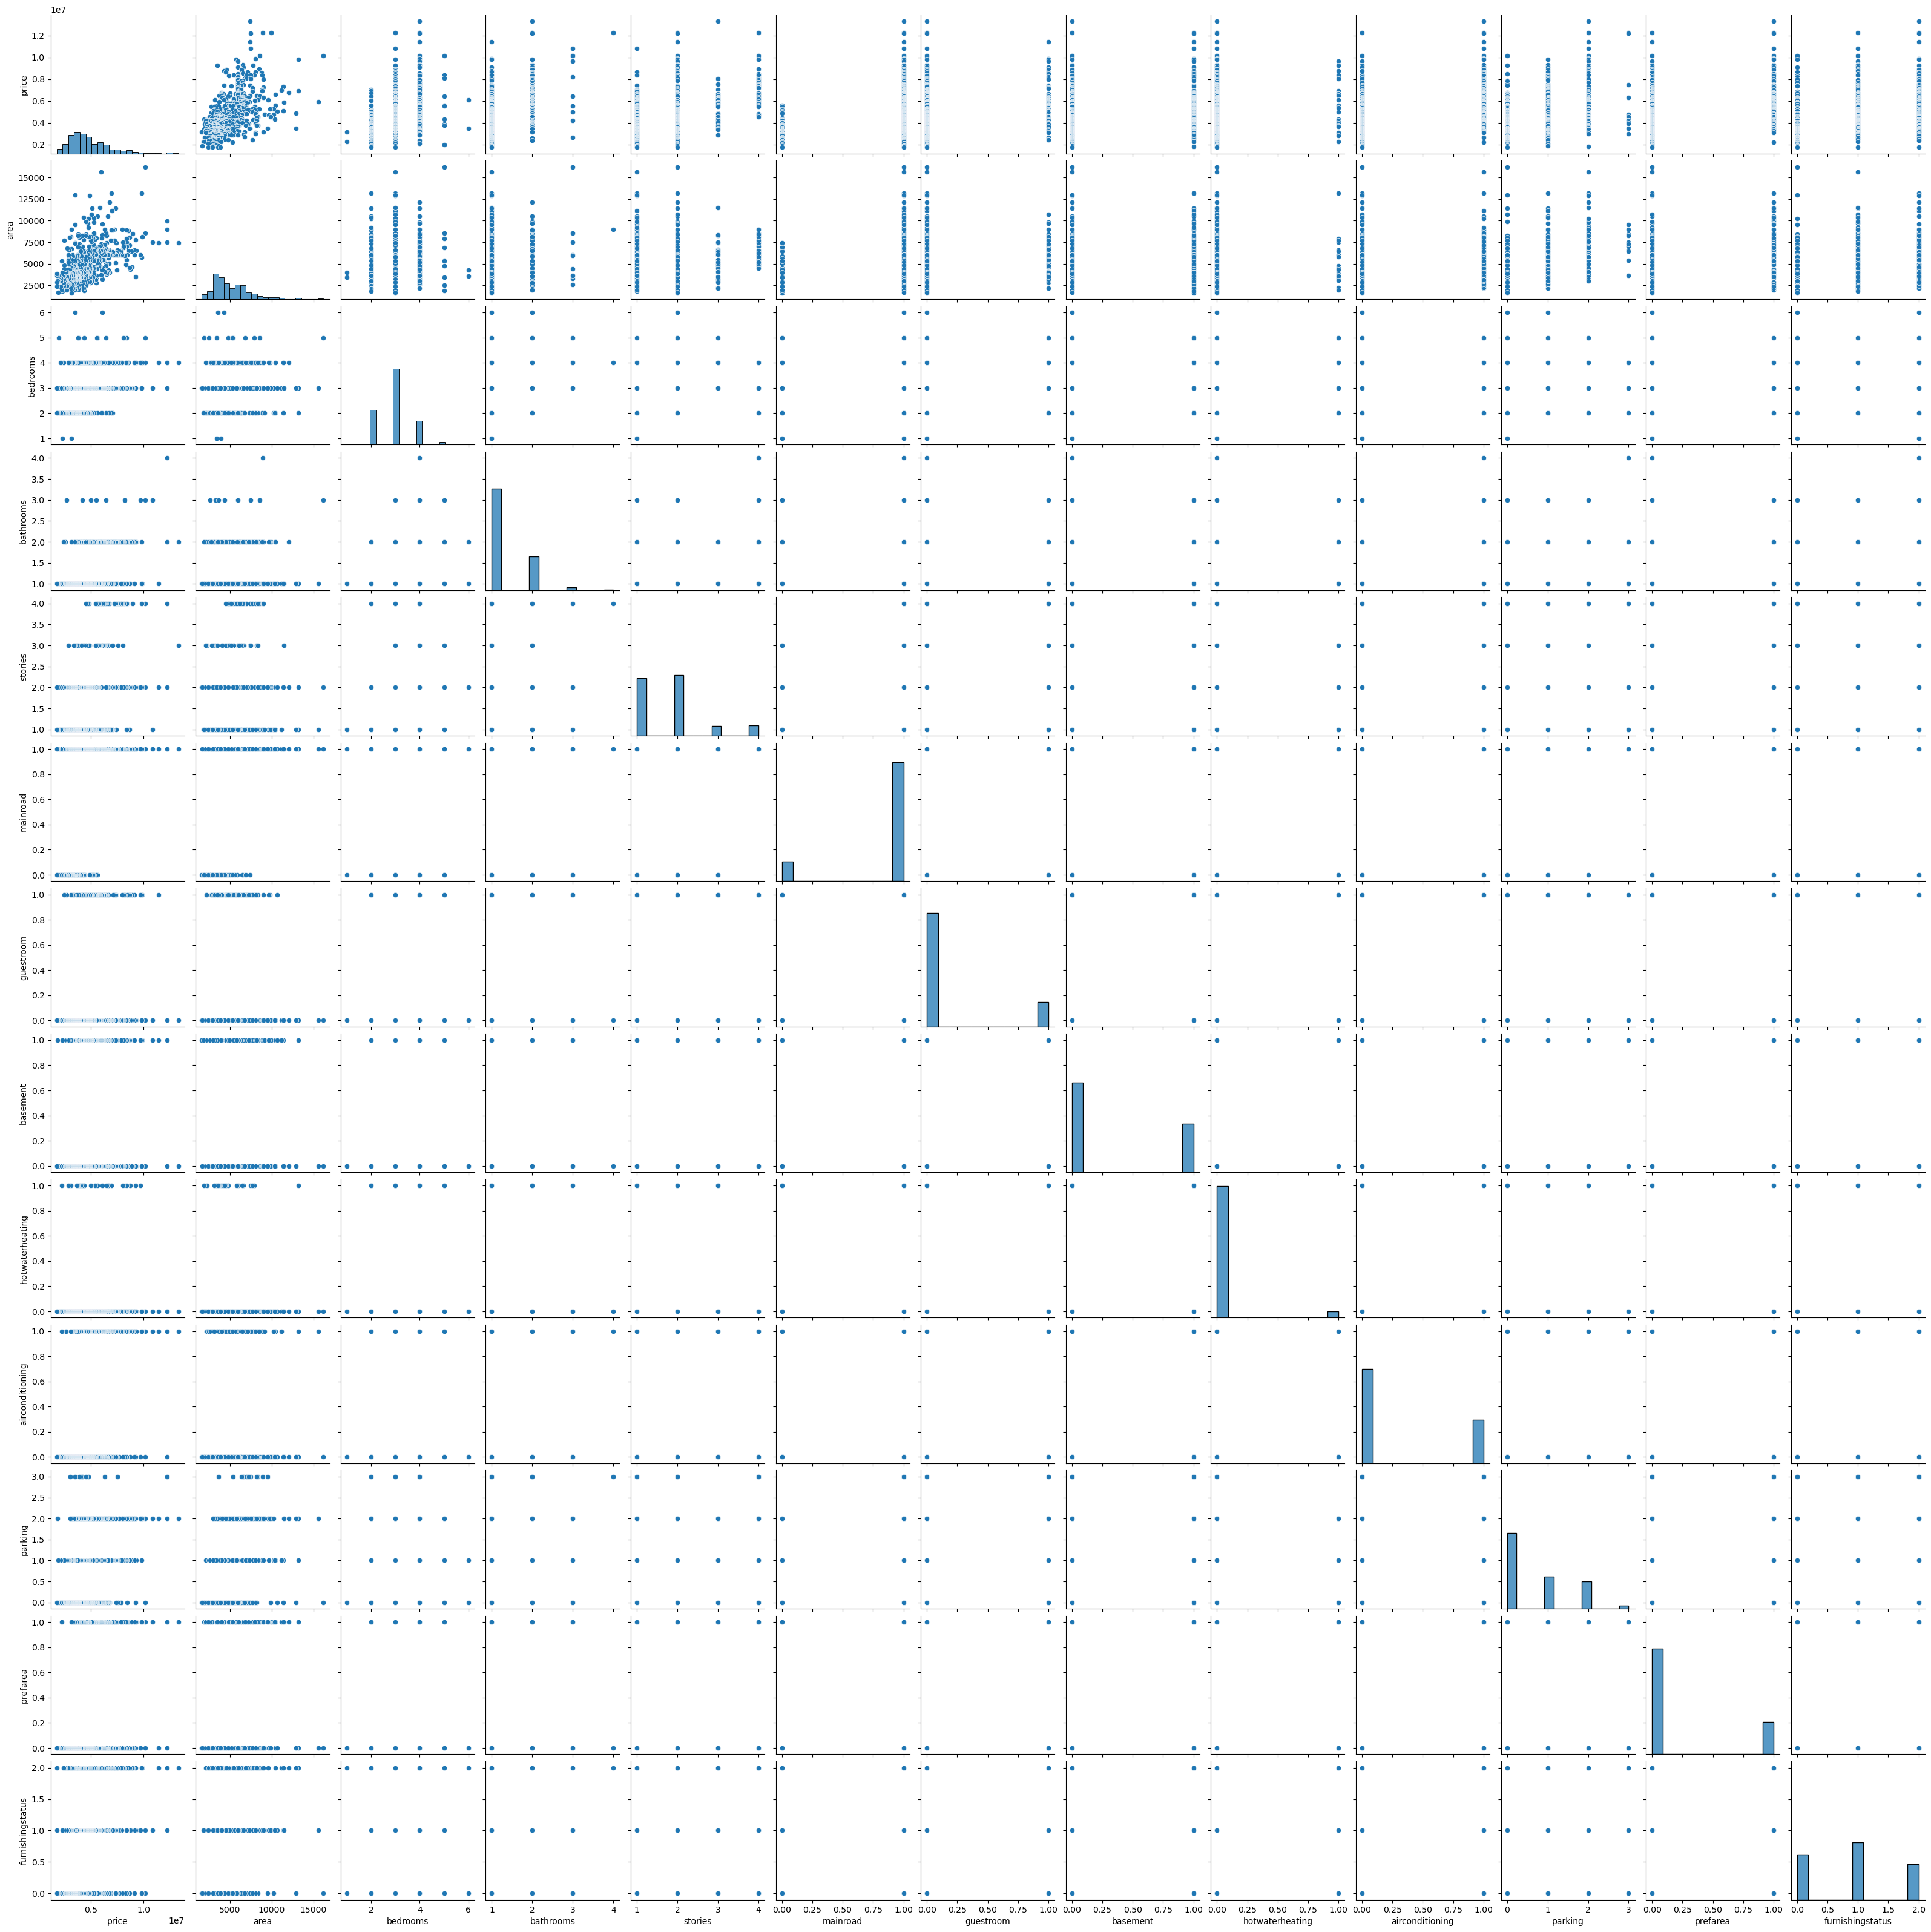

In [11]:
sns.pairplot(df)
plt.show()

In [12]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


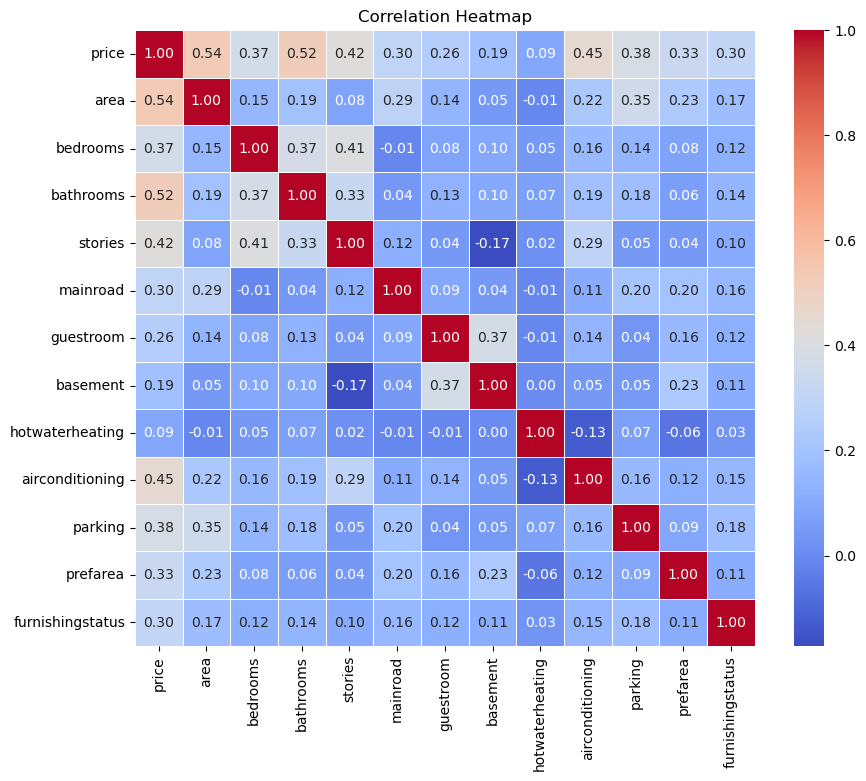

<Figure size 640x480 with 0 Axes>

In [13]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#Save the image below
plt.savefig("Correlation Heatmap.png",dpi = 300,bbox_inches ="tight")

In [14]:
X = df.drop("price",axis=1)
y = df["price"]

In [15]:
np.random.seed(42)

#split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Creating a Randomforest model
model =RandomForestRegressor()

#fit the model
model.fit(X_train,y_train)

RandomForestRegressor()

In [16]:
model.score(X_test,y_test)

0.6180011538281975

In [17]:
np.random.seed(42)
 
#split data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
 
#Define model
Lr_model = LinearRegression()
 
#Fit model
Lr_model.fit(X_train, y_train)

LinearRegression()

In [18]:
#Score of model
Lr_model.score(X_test, y_test)

0.6494754192267804

In [19]:
y_test

316    4060000
77     6650000
360    3710000
90     6440000
493    2800000
        ...   
15     9100000
357    3773000
39     7910000
54     7350000
155    5530000
Name: price, Length: 109, dtype: int64

In [20]:
y_test.mean()

5007536.697247706

In [21]:
#fill an array with y_test mean
y_test_mean = np.full(len(y_test),y_test.mean())
y_test_mean

array([5007536.69724771, 5007536.69724771, 5007536.69724771,
       5007536.69724771, 5007536.69724771, 5007536.69724771,
       5007536.69724771, 5007536.69724771, 5007536.69724771,
       5007536.69724771, 5007536.69724771, 5007536.69724771,
       5007536.69724771, 5007536.69724771, 5007536.69724771,
       5007536.69724771, 5007536.69724771, 5007536.69724771,
       5007536.69724771, 5007536.69724771, 5007536.69724771,
       5007536.69724771, 5007536.69724771, 5007536.69724771,
       5007536.69724771, 5007536.69724771, 5007536.69724771,
       5007536.69724771, 5007536.69724771, 5007536.69724771,
       5007536.69724771, 5007536.69724771, 5007536.69724771,
       5007536.69724771, 5007536.69724771, 5007536.69724771,
       5007536.69724771, 5007536.69724771, 5007536.69724771,
       5007536.69724771, 5007536.69724771, 5007536.69724771,
       5007536.69724771, 5007536.69724771, 5007536.69724771,
       5007536.69724771, 5007536.69724771, 5007536.69724771,
       5007536.69724771,

In [22]:
r2_score(y_true =y_test,
        y_pred=y_test_mean)

0.0

In [23]:
r2_score(y_true =y_test,
        y_pred=y_test)

1.0

#### Mean absolute error (MAE)

In [24]:
# For RandomForestRegression

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test,y_preds)
mae

1016764.5642201835

In [25]:
y_test

316    4060000
77     6650000
360    3710000
90     6440000
493    2800000
        ...   
15     9100000
357    3773000
39     7910000
54     7350000
155    5530000
Name: price, Length: 109, dtype: int64

In [26]:
y_preds

array([5604025.        , 7123060.        , 3789135.        ,
       4613700.        , 3485125.        , 3444000.        ,
       5060230.        , 5088510.        , 2597000.        ,
       2910603.5       , 9878989.4       , 3288673.5       ,
       3031863.33333333, 3429090.        , 3677187.5       ,
       3889620.        , 3307680.83333333, 5003460.        ,
       3803100.        , 3935050.        , 5464410.        ,
       5851230.        , 3068525.83333333, 3793020.        ,
       4664100.        , 6434085.        , 3265360.        ,
       4651850.        , 6630890.        , 3272360.        ,
       5450200.        , 3104500.        , 6972840.        ,
       4258100.        , 3021795.        , 5996760.        ,
       4695460.        , 3634435.        , 2993060.        ,
       4442620.        , 4093180.        , 2828694.16666667,
       7219240.        , 4302480.        , 3922450.        ,
       4298980.        , 7126840.        , 4083100.        ,
       2795310.        ,

In [27]:
# create a dataframe to be able to visualize this proper
df = pd.DataFrame(data= {"Actual":y_test,
                        "Predicted values":y_preds})
df["Difference"] = df["Actual"] - df["Predicted values"]
df.head(10)

,Actual,Predicted values,Difference
316,4060000,5604025.0,-1544025.0
77,6650000,7123060.0,-473060.0
360,3710000,3789135.0,-79135.0
90,6440000,4613700.0,1826300.0
493,2800000,3485125.0,-685125.0
209,4900000,3444000.0,1456000.0
176,5250000,5060230.0,189770.0
249,4543000,5088510.0,-545510.0
516,2450000,2597000.0,-147000.0
426,3353000,2910603.5,442396.5


In [28]:
# lets turn the difference to absolute value
# MAE using formular
np.abs(df["Difference"]).mean()

1016764.5642201835

In [29]:
#For Linear Regression
y_preds = Lr_model.predict(X_test)
mae = mean_absolute_error(y_test,y_preds)
mae

979679.6912959901

In [30]:
# create a dataframe to be able to visualize this proper
df = pd.DataFrame(data= {"Actual":y_test,
                        "Predicted values":y_preds})
df["Difference"] = df["Actual"] - df["Predicted values"]
df.head(10)

,Actual,Predicted values,Difference
316,4060000,5.203692e+06,-1.143692e+06
77,6650000,7.257004e+06,-6.070040e+05
360,3710000,3.062829e+06,6.471714e+05
90,6440000,4.559592e+06,1.880408e+06
493,2800000,3.332932e+06,-5.329323e+05
209,4900000,3.563081e+06,1.336919e+06
176,5250000,5.645466e+06,-3.954663e+05
249,4543000,6.413980e+06,-1.870980e+06
516,2450000,2.755832e+06,-3.058315e+05
426,3353000,2.668939e+06,6.840613e+05


In [31]:
# lets turn the difference to absolute value
# MAE using formular
np.abs(df["Difference"]).mean()

979679.6912959901

In [33]:
def rmsle(y_test,y_preds):
    """ Calculate root mean squared log error between predictions and true labels"""
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

#create function to evaluate model on a few different levels

def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_test)
    scores = {"Training MAE": mean_absolute_error(y_train,y_preds),
             "Test MAE": mean_absolute_error(y_test,y_preds),
             #"Training RMSLE":rmsle(y_train,y_preds),
             #"Test RMSLE": rmsle(y_test,y_preds),
              "Training R^2":r2_score(y_train,y_preds),
             "Test R^2": r2_score(y_test,y_preds)}
    return scores

In [34]:
#Evalaute model using functions we have imported
#r2
r2 = r2_score(y_test,y_preds)
print(f"R squre: {r2:.2f}")
#mean_absolute_error
mae = mean_absolute_error(y_test, y_preds)
print(f"Mean Absolute Error: {mae:.2f}")

#mean_squared_error
mse = mean_squared_error(y_test, y_preds)
print(f"Mean squared Error: {mse:.2f}")

R squre: 0.65
Mean Absolute Error: 979679.69
Mean squared Error: 1771751116594.03


### Tuning of Parameter

In [39]:
np.random.seed(42)
 
param_dist = {
    'fit_intercept': [True, False],  # Whether to fit the intercept
}
#Define model
Lr_model_2 = LinearRegression()
 
# Setup RandomizedSearchCV
rs_Lr_model_2 = RandomizedSearchCV(Lr_model_2, param_distributions=param_dist, n_iter=2, cv=5)
#Fit Randomized model
rs_Lr_model_2.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LinearRegression(), n_iter=2,
                   param_distributions={'fit_intercept': [True, False]})

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define the hyperparameter distributions
param_dist = {
    'fit_intercept': [True, False],  # Whether to include intercept
    'n_jobs': [-1],                   # Number of CPU cores to use during the computation
    'positive': [True, False]         # Whether to constrain the coefficients to be non-negative
}

# Create a linear regression model
lr = LinearRegression()

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(lr, param_distributions=param_dist, n_iter=10, scoring='neg_mean_squared_error')

# Fit the random search to your data
random_search.fit(X_train, y_train)

# Get the best model
best_model = random_search.best_estimator_

# Evaluate the best model
best_model_score = -random_search.best_score_


C:\Users\okeya\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
